# Data Preparation and Descriptive Statistics

In [1]:
import pandas as pd
data = pd.read_csv('analise_risco_total.csv',sep=';')
data.head(10)

,id_pessoa,idade_pessoa,salario_pessoa,propriedade_pessoa,tempo_trabalho,id_emprestimo,motivo_emprestimo,nivel_emprestimo,total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,id_historico,inadimplencia_historico,tempo_ultimo_credito
0,AspC7qDK-5Esh,21,60000,Alugada,2.0,kZHfWgGv-0dWJ,Educativo,B,8000,11.26,0,0.13,UwfbzeaW-9tQt,nao,3
1,2NjYU2iT-fGSm,40,70000,Hipotecada,6.0,j7elJxsY-eTEQ,Educativo,A,18000,7.90,0,0.26,viRQ2WYn-yJ2G,nao,14
2,nTOKgZCT-YPUD,29,115000,Hipotecada,3.0,t9dKvc6a-4eAL,Medico,C,22000,15.23,0,0.19,IEHObaim-KPC9,sim,7
3,J3jGNZeh-OzZE,26,84996,Alugada,0.0,NaelpPC5-t2kz,Medico,B,9000,11.26,0,0.11,GvqL52S8-S8OH,nao,2
4,flpZfspk-bUuL,23,54500,Alugada,2.0,4NHe4vfi-QLvW,Pagamento de debitos,A,8000,0.00,0,0.15,fbc8cPEp-uJEB,nao,2
5,HIWfRjYs-Z9XU,40,44000,Alugada,0.0,tilhQ4Ny-usUE,Pessoal,A,6000,0.00,1,0.14,yGtY95es-ueBR,nao,12
6,OQXEoNPl-hL0f,23,24000,Propria,7.0,QxdBboWP-KKFh,Educativo,A,5000,7.49,0,0.21,Ue0IMCKa-d0AQ,nao,2
7,GiP48I8v-4QMo,27,56253,Alugada,11.0,uYH6bhrT-ewlf,Empreendimento,B,10000,11.36,0,0.18,ZSKhw1Wq-Grfc,nao,8
8,rz6KYxBX-SCcJ,32,19200,Alugada,0.0,rexKO1Fs-lZn3,Empreendimento,B,5000,9.99,1,0.26,gngDxDmO-YH6A,nao,6
9,IJKlCu5g-hK22,24,18000,Propria,0.0,Ki2Rr7Di-8Is1,Melhora do lar,A,6250,6.54,1,0.35,b8bJFyze-0WBF,nao,4


In [2]:
# Evaluating the data distribution and possible outliers
descdata = data.describe().transpose()
#descdata['std']*100/descdata['mean']
descdata

,count,mean,std,min,25%,50%,75%,max
idade_pessoa,34445.0,27.679750,6.198401,20.0,23.00,26.00,30.00,9.400000e+01
salario_pessoa,34445.0,66021.547540,61261.909517,4000.0,38492.00,55000.00,79200.00,6.000000e+06
tempo_trabalho,34445.0,4.606039,4.060282,0.0,2.00,4.00,7.00,4.100000e+01
total_emprestimo,34445.0,9583.515140,6366.673104,0.0,5000.00,8000.00,12200.00,9.936000e+04
taxa_juros,34445.0,9.853002,4.562504,0.0,7.49,10.59,13.11,2.322000e+01
possibilidade_inadimplencia,34445.0,0.216113,0.411598,0.0,0.00,0.00,0.00,1.000000e+00
renda_percentual,34445.0,0.170261,0.107664,0.0,0.09,0.15,0.23,1.418919e+00
tempo_ultimo_credito,34445.0,5.807142,4.064048,0.0,3.00,4.00,8.00,3.000000e+01


In [3]:
data.quantile([0.25,0.5,0.9999])

,idade_pessoa,salario_pessoa,tempo_trabalho,total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,tempo_ultimo_credito
0.2500,23.0,38492.0,2.0,5000.0000,7.49,0.0,0.090000,3.0
0.5000,26.0,55000.0,4.0,8000.0000,10.59,0.0,0.150000,4.0
0.9999,78.0,1630015.2,31.0,46506.8636,22.11,1.0,0.812064,30.0


In [4]:
cols_to_evaluate = ['idade_pessoa', 'salario_pessoa','tempo_trabalho', 'total_emprestimo', 'taxa_juros']
for col in cols_to_evaluate:
    print(f'{col} upper: {data[col].quantile(q=0.999999)} -- lower: {data[col].quantile(q=0.000001)}')

idade_pessoa upper: 93.65555999995559 -- lower: 20.0
salario_pessoa upper: 5863594.320078411 -- lower: 4002.75552
tempo_trabalho upper: 40.896667999986676 -- lower: 0.0
total_emprestimo upper: 98445.16735988203 -- lower: 0.0
taxa_juros upper: 23.194511439996713 -- lower: 0.0


In [5]:
# Eliminate the entries with age above the 0.001% top and bellow the 0.001% bottom values
data = data[(data['idade_pessoa'] < data['idade_pessoa'].quantile(q=0.999999))&(data['idade_pessoa'] > data['idade_pessoa'].quantile(q=0.000001))]

In [6]:
# Eliminate the entries with salary above the 0.001% top and bellow the 0.001% bottom values
data = data[(data['salario_pessoa'] < data['salario_pessoa'].quantile(q=0.999999))&(data['salario_pessoa'] > data['salario_pessoa'].quantile(q=0.000001))]

In [7]:
#Check for null values on the categorical variables
data[data[['inadimplencia_historico','nivel_emprestimo','propriedade_pessoa']].isnull().values]
#data[['inadimplencia_historico','nivel_emprestimo','propriedade_pessoa']]

,id_pessoa,idade_pessoa,salario_pessoa,propriedade_pessoa,tempo_trabalho,id_emprestimo,motivo_emprestimo,nivel_emprestimo,total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,id_historico,inadimplencia_historico,tempo_ultimo_credito
40,pzB2WCoa-gXSS,28,95000,Hipotecada,5.0,tRWrqNFB-5hR7,Empreendimento,A,1800,0.00,0,0.070000,GR7jm1kY-7pku,NaN,4
147,LPL286b5-nzmc,24,47000,Alugada,8.0,xTE1h5Kz-PsYS,Pagamento de debitos,B,8930,11.49,0,0.190000,aqy3O2yH-AIYH,NaN,4
198,e9vGEkKY-wIYu,23,54545,Hipotecada,7.0,GI5eaJNm-kew4,Medico,NaN,6000,7.90,0,0.110000,c09fqHnt-hJXm,nao,7
298,0bPhmpB1-DfmY,23,65000,Alugada,2.0,apYOmheF-yatl,Pagamento de debitos,NaN,5000,14.59,0,0.180000,MZnUNtq1-zE9d,sim,10
443,2G5iztmS-qjb6,22,31905,Hipotecada,6.0,gPg1pxjB-KKkI,Educativo,A,6700,14.26,0,0.210000,rGg1z5Mu-GBI0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34302,3bqvNib0-QeFz,27,15120,Alugada,6.0,6yrU1yfA-kbTd,Pessoal,B,9500,0.00,0,0.190000,XcEmu644-MCHq,NaN,8
34322,WXEUKki0-7h4F,33,48000,Alugada,11.0,rCWowg7u-Mhdy,Pagamento de debitos,NaN,11050,12.69,0,0.090000,nHG1PkLz-QMF6,nao,6
34362,eIlOLIdG-IEPa,24,60000,Hipotecada,8.0,mrMgBhJP-HcS9,Empreendimento,B,10000,0.00,0,0.166667,YCPj17uj-IoWo,NaN,9
34389,QllpqDIH-iovR,26,40000,Alugada,0.0,N2a6sMlJ-JmOd,Pessoal,NaN,2000,0.00,0,0.120000,opqri2Lx-sAmT,nao,3


In [8]:
data[data.isnull().values]

,id_pessoa,idade_pessoa,salario_pessoa,propriedade_pessoa,tempo_trabalho,id_emprestimo,motivo_emprestimo,nivel_emprestimo,total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,id_historico,inadimplencia_historico,tempo_ultimo_credito
40,pzB2WCoa-gXSS,28,95000,Hipotecada,5.0,tRWrqNFB-5hR7,Empreendimento,A,1800,0.00,0,0.070000,GR7jm1kY-7pku,NaN,4
147,LPL286b5-nzmc,24,47000,Alugada,8.0,xTE1h5Kz-PsYS,Pagamento de debitos,B,8930,11.49,0,0.190000,aqy3O2yH-AIYH,NaN,4
198,e9vGEkKY-wIYu,23,54545,Hipotecada,7.0,GI5eaJNm-kew4,Medico,NaN,6000,7.90,0,0.110000,c09fqHnt-hJXm,nao,7
298,0bPhmpB1-DfmY,23,65000,Alugada,2.0,apYOmheF-yatl,Pagamento de debitos,NaN,5000,14.59,0,0.180000,MZnUNtq1-zE9d,sim,10
443,2G5iztmS-qjb6,22,31905,Hipotecada,6.0,gPg1pxjB-KKkI,Educativo,A,6700,14.26,0,0.210000,rGg1z5Mu-GBI0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34302,3bqvNib0-QeFz,27,15120,Alugada,6.0,6yrU1yfA-kbTd,Pessoal,B,9500,0.00,0,0.190000,XcEmu644-MCHq,NaN,8
34322,WXEUKki0-7h4F,33,48000,Alugada,11.0,rCWowg7u-Mhdy,Pagamento de debitos,NaN,11050,12.69,0,0.090000,nHG1PkLz-QMF6,nao,6
34362,eIlOLIdG-IEPa,24,60000,Hipotecada,8.0,mrMgBhJP-HcS9,Empreendimento,B,10000,0.00,0,0.166667,YCPj17uj-IoWo,NaN,9
34389,QllpqDIH-iovR,26,40000,Alugada,0.0,N2a6sMlJ-JmOd,Pessoal,NaN,2000,0.00,0,0.120000,opqri2Lx-sAmT,nao,3


In [9]:
data['inadimplencia_historico'].value_counts(dropna = False)

nao    28011
sim     5978
NaN      365
Name: inadimplencia_historico, dtype: int64

In [10]:
data['nivel_emprestimo'].value_counts(dropna = False)

A      11269
B      10928
C       6734
D       3788
E       1007
NaN      310
F        254
G         64
Name: nivel_emprestimo, dtype: int64

In [11]:
data['propriedade_pessoa'].value_counts(dropna = False)

Alugada         17172
Hipotecada      14035
Propria          2707
Outros Casos      440
Name: propriedade_pessoa, dtype: int64

In [12]:
#Drop nan values from all cols
data.dropna(subset = ['inadimplencia_historico', 'nivel_emprestimo','propriedade_pessoa'], inplace = True)

In [13]:
#Convert the No, Yes to 0 and 1 and the nivel emprestimo data
convert_data = {'inadimplencia_historico':{'sim':1,'nao':0},
               'nivel_emprestimo':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}}
data = data.replace(convert_data)

In [14]:
#Convert the property type with one hot encoding
data = pd.get_dummies(data,columns = ['propriedade_pessoa'])

In [18]:
#Convert the reason for the loan
data = pd.get_dummies(data,columns = ['motivo_emprestimo'])

In [21]:
data.columns

Index(['id_pessoa', 'idade_pessoa', 'salario_pessoa', 'tempo_trabalho',
       'id_emprestimo', 'nivel_emprestimo', 'total_emprestimo', 'taxa_juros',
       'possibilidade_inadimplencia', 'renda_percentual', 'id_historico',
       'inadimplencia_historico', 'tempo_ultimo_credito',
       'propriedade_pessoa_Alugada', 'propriedade_pessoa_Hipotecada',
       'propriedade_pessoa_Outros Casos', 'propriedade_pessoa_Propria',
       'motivo_emprestimo_Educativo', 'motivo_emprestimo_Empreendimento',
       'motivo_emprestimo_Medico', 'motivo_emprestimo_Melhora do lar',
       'motivo_emprestimo_Outro', 'motivo_emprestimo_Pagamento de debitos',
       'motivo_emprestimo_Pessoal'],
      dtype='object')

In [22]:
#Drop all the non-numeric columns
data_num = data.drop(['id_pessoa','id_emprestimo','nivel_emprestimo','id_historico'],axis=1).copy()

In [24]:
data_num.head(10)

,idade_pessoa,salario_pessoa,tempo_trabalho,total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,inadimplencia_historico,tempo_ultimo_credito,propriedade_pessoa_Alugada,propriedade_pessoa_Hipotecada,propriedade_pessoa_Outros Casos,propriedade_pessoa_Propria,motivo_emprestimo_Educativo,motivo_emprestimo_Empreendimento,motivo_emprestimo_Medico,motivo_emprestimo_Melhora do lar,motivo_emprestimo_Outro,motivo_emprestimo_Pagamento de debitos,motivo_emprestimo_Pessoal
0,21,60000,2.0,8000,11.26,0,0.13,0,3,1,0,0,0,1,0,0,0,0,0,0
1,40,70000,6.0,18000,7.90,0,0.26,0,14,0,1,0,0,1,0,0,0,0,0,0
2,29,115000,3.0,22000,15.23,0,0.19,1,7,0,1,0,0,0,0,1,0,0,0,0
3,26,84996,0.0,9000,11.26,0,0.11,0,2,1,0,0,0,0,0,1,0,0,0,0
4,23,54500,2.0,8000,0.00,0,0.15,0,2,1,0,0,0,0,0,0,0,0,1,0
5,40,44000,0.0,6000,0.00,1,0.14,0,12,1,0,0,0,0,0,0,0,0,0,1
6,23,24000,7.0,5000,7.49,0,0.21,0,2,0,0,0,1,1,0,0,0,0,0,0
7,27,56253,11.0,10000,11.36,0,0.18,0,8,1,0,0,0,0,1,0,0,0,0,0
8,32,19200,0.0,5000,9.99,1,0.26,0,6,1,0,0,0,0,1,0,0,0,0,0
9,24,18000,0.0,6250,6.54,1,0.35,0,4,0,0,0,1,0,0,0,1,0,0,0


In [25]:
#Check the pearson correlation of the data
data.corr()

,idade_pessoa,salario_pessoa,tempo_trabalho,nivel_emprestimo,total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,inadimplencia_historico,tempo_ultimo_credito,...,propriedade_pessoa_Hipotecada,propriedade_pessoa_Outros Casos,propriedade_pessoa_Propria,motivo_emprestimo_Educativo,motivo_emprestimo_Empreendimento,motivo_emprestimo_Medico,motivo_emprestimo_Melhora do lar,motivo_emprestimo_Outro,motivo_emprestimo_Pagamento de debitos,motivo_emprestimo_Pessoal
idade_pessoa,1.000000,0.139392,0.170416,0.012653,0.048196,0.003251,-0.020887,-0.043128,0.006767,0.848973,...,0.033787,-0.007188,-0.001098,-0.091764,-0.012997,0.021519,0.075850,-0.008388,-0.008546,0.035100
salario_pessoa,0.139392,1.000000,0.161204,-0.003004,0.313033,-0.004141,-0.164281,-0.288644,-0.003388,0.120650,...,0.233870,0.005029,-0.044942,-0.016767,0.004361,-0.039977,0.052268,-0.004199,0.003957,0.008250
tempo_trabalho,0.170416,0.161204,1.000000,-0.038606,0.114733,-0.028522,-0.087079,-0.062757,-0.023729,0.141173,...,0.217371,-0.009002,0.014067,-0.035017,0.010911,-0.001414,0.030723,-0.019998,-0.003369,0.009729
nivel_emprestimo,0.012653,-0.003004,-0.038606,1.000000,0.140779,0.587401,0.361244,0.118644,0.520062,0.015428,...,-0.114215,0.007289,-0.017357,-0.007914,-0.011422,0.002002,0.030874,-0.005696,0.000297,-0.006938
total_emprestimo,0.048196,0.313033,0.114733,0.140779,1.000000,0.095615,0.107049,0.574362,0.038584,0.040997,...,0.126473,0.009413,-0.027003,-0.007970,-0.000495,-0.023168,0.041812,-0.002459,-0.001002,-0.000430
taxa_juros,0.003251,-0.004141,-0.028522,0.587401,0.095615,1.000000,0.222854,0.076782,0.326554,0.001894,...,-0.088613,-0.020060,-0.004794,0.000555,-0.008428,-0.001993,0.019767,-0.014757,-0.004013,0.000744
possibilidade_inadimplencia,-0.020887,-0.164281,-0.087079,0.361244,0.107049,0.222854,1.000000,0.374506,0.177670,-0.015020,...,-0.180366,0.001080,-0.099328,-0.053714,-0.076488,0.055555,0.034939,0.003586,0.068867,-0.020503
renda_percentual,-0.043128,-0.288644,-0.062757,0.118644,0.574362,0.076782,0.374506,1.000000,0.035201,-0.033455,...,-0.144876,0.015402,0.049116,0.000591,0.000813,0.011882,-0.015151,0.002586,0.002739,-0.004375
inadimplencia_historico,0.006767,-0.003388,-0.023729,0.520062,0.038584,0.326554,0.177670,0.035201,1.000000,0.004490,...,-0.059375,0.003667,-0.002683,-0.007178,-0.004638,-0.002455,0.015136,0.001908,0.004706,-0.002826
tempo_ultimo_credito,0.848973,0.120650,0.141173,0.015428,0.040997,0.001894,-0.015020,-0.033455,0.004490,1.000000,...,0.024336,-0.007156,0.005089,-0.076274,-0.008432,0.016628,0.057445,-0.002379,-0.010864,0.035405


In [26]:
data_norm = (data_num-data_num.min())/(data_num.max()-data_num.min())

In [30]:
data_norm.head()

,idade_pessoa,salario_pessoa,tempo_trabalho,total_emprestimo,taxa_juros,possibilidade_inadimplencia,renda_percentual,inadimplencia_historico,tempo_ultimo_credito,propriedade_pessoa_Alugada,propriedade_pessoa_Hipotecada,propriedade_pessoa_Outros Casos,propriedade_pessoa_Propria,motivo_emprestimo_Educativo,motivo_emprestimo_Empreendimento,motivo_emprestimo_Medico,motivo_emprestimo_Melhora do lar,motivo_emprestimo_Outro,motivo_emprestimo_Pagamento de debitos,motivo_emprestimo_Pessoal
0,0.000000,0.027470,0.048780,0.080515,0.484927,0.0,0.091619,0.0,0.035714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.301587,0.032382,0.146341,0.181159,0.340224,0.0,0.183238,0.0,0.428571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.126984,0.054487,0.073171,0.221417,0.655900,0.0,0.133905,1.0,0.178571,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.079365,0.039748,0.000000,0.090580,0.484927,0.0,0.077524,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.031746,0.024768,0.048780,0.080515,0.000000,0.0,0.105714,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#Probability of not paying will be the focus variable to be explained by the other variables
data_norm.corr()['possibilidade_inadimplencia']

idade_pessoa                             -0.020887
salario_pessoa                           -0.164281
tempo_trabalho                           -0.087079
total_emprestimo                          0.107049
taxa_juros                                0.222854
possibilidade_inadimplencia               1.000000
renda_percentual                          0.374506
inadimplencia_historico                   0.177670
tempo_ultimo_credito                     -0.015020
propriedade_pessoa_Alugada                0.230708
propriedade_pessoa_Hipotecada            -0.180366
propriedade_pessoa_Outros Casos           0.001080
propriedade_pessoa_Propria               -0.099328
motivo_emprestimo_Educativo              -0.053714
motivo_emprestimo_Empreendimento         -0.076488
motivo_emprestimo_Medico                  0.055555
motivo_emprestimo_Melhora do lar          0.034939
motivo_emprestimo_Outro                   0.003586
motivo_emprestimo_Pagamento de debitos    0.068867
motivo_emprestimo_Pessoal      

# Machine Learning Models

In [33]:
#Splitting the data between the conditional variables and the independent ones
from sklearn.model_selection import train_test_split
conditional = data_norm['possibilidade_inadimplencia']
independent = data_norm.drop('possibilidade_inadimplencia',axis=1).copy()
#Splitting the data between training and test data
X_train,X_test,y_train,y_test = train_test_split(independent,conditional,shuffle = True,test_size = 0.3,random_state = 1)
# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (23600, 19)
Shape of testing feature: (10115, 19)
Shape of training label: (23600,)
Shape of training label: (10115,)


In [34]:
#Here will go the metrics to evaluate the tests that are going to be later done
from sklearn import metrics
def evaluate_model(model, x_test, y_test):
    
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    return {'Accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'cohen kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'Area Under Curve': auc, 'Confusion Matrix': confusion_matrix}

In [36]:
#First Model - Decision Tree
from sklearn import tree
#Decision tree model
dec_tree = tree.DecisionTreeClassifier(random_state = 0)
dec_tree.fit(X_train,y_train)

#Evaluate model
dec_tree_eval = evaluate_model(dec_tree,X_test,y_test)

ps = ['Accuracy','precision','recall','f1','cohen kappa','Area Under Curve','Confusion Matrix']
#Print results
for p in ps:
    print(f'{p} : {dec_tree_eval[p]}')

Accuracy : 0.8699950568462679
precision : 0.6812472932005197
recall : 0.7309479553903345
f1 : 0.7052230441605021
cohen kappa : 0.6219640433378024
Area Under Curve : 0.8192602391544163
Confusion Matrix : [[7227  736]
 [ 579 1573]]


In [37]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)
for p in ps:
    print(f'{p} : {rf_eval[p]}')

Accuracy : 0.92011863568957
precision : 0.9242424242424242
recall : 0.6802973977695167
f1 : 0.7837259100642399
cohen kappa : 0.7361199613691081
Area Under Curve : 0.9232298299243668
Confusion Matrix : [[7843  120]
 [ 688 1464]]


In [38]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)
for p in ps:
    print(f'{p} : {nb_eval[p]}')

Accuracy : 0.7732081067721206
precision : 0.47644326476443266
recall : 0.6672862453531598
f1 : 0.5559427022841656
cohen kappa : 0.4092992195832812
Area Under Curve : 0.8045925813019043
Confusion Matrix : [[6385 1578]
 [ 716 1436]]


In [39]:
#K-NEarest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

for p in ps:
    print(f'{p} : {knn_eval[p]}')

Accuracy : 0.8689075630252101
precision : 0.7880055788005579
recall : 0.525092936802974
f1 : 0.6302286670384829
cohen kappa : 0.5544090464549138
Area Under Curve : 0.8228141119219139
Confusion Matrix : [[7659  304]
 [1022 1130]]


# Compare the Models

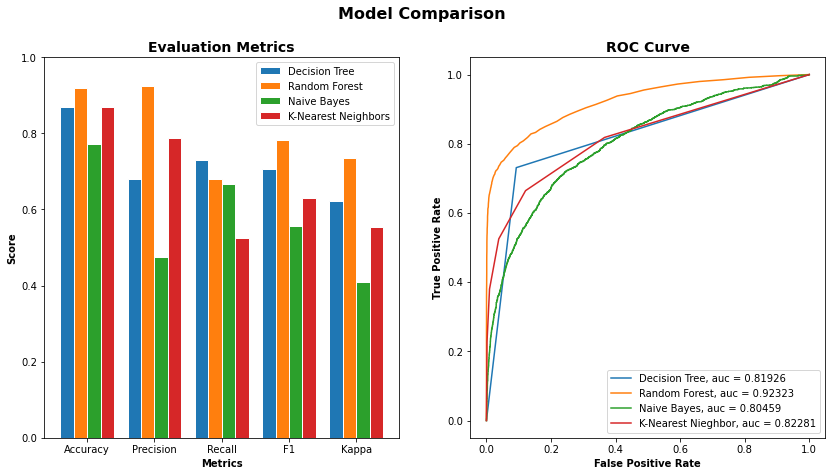

In [45]:
import matplotlib.pyplot as plt
import numpy as np
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dec_tree_score = [dec_tree_eval['Accuracy'], dec_tree_eval['precision'], dec_tree_eval['recall'], dec_tree_eval['f1'], dec_tree_eval['cohen kappa']]
rf_score = [rf_eval['Accuracy'], rf_eval['precision'], rf_eval['recall'], rf_eval['f1'], rf_eval['cohen kappa']]
nb_score = [nb_eval['Accuracy'], nb_eval['precision'], nb_eval['recall'], nb_eval['f1'], nb_eval['cohen kappa']]
knn_score = [knn_eval['Accuracy'], knn_eval['precision'], knn_eval['recall'], knn_eval['f1'], knn_eval['cohen kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dec_tree_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dec_tree_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dec_tree_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dec_tree_eval['fpr'], dec_tree_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dec_tree_eval['Area Under Curve']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['Area Under Curve']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['Area Under Curve']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['Area Under Curve']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

### Here we can see the Random Forest Outpermed all th other methods followed by Decision Tree, K-nearest Neightbours and Naive Bayes